<span style="font-size: 32px; font-weight: bold;">Video Games Popularity and Sales Analysis</span>

<span id="contents" style="font-size:20pt; font-weight: bold;">Contents</span>

1. [Initialization](#Initialization)
   - [Background](#Background)
   - [Libraries](#Libraries)
   - [Data Overview](#Data-Overview)
   

2. [Data Preparation](#Data-Preparation)
   - [Column Naming](#Column-Naming)
   - [Data Refinement](#Data-Refinement)
       - [Column `name`](#Column-name)
       - [Column `year_of_release`](#Column-year_of_release)
       - [Column `genre`](#Column-genre)
       - [Column `critic_score`](#Column-critic_score)
       - [Column `user_score`](#Column-user_score)
       - [Column `rating`](#Column-rating)
       - [Duplicates](#Duplicates)
   - [Data Quality Enhancement](#Data-Quality-Enhancement)
       
       
3. [Anaslysis](#Analysis)
   - [Production Trend by Platform](#Production-Trend-by-Platform)
   - [Sales by Platform](#Sales-by-Platform)
   - [Global Sales Overview](#Global-Sales-Overview)
   - [Game Reviews and Sales Figure](#Game-Reviews-and-Sales-Figure)
   - [Multiplatform Game Sales](#Multiplatform-Game-Sales)
   - [Popularity by Genre](#Popularity-by-Genre)
    
       
4. [User Profile by Region](#User-Profile-by-Region)
   - [Platform Popularity by Region](#Platform-Popularity-by-Region)
       - [Popular Platform in European Market](#Popular-Platform-in-European-Market)
       - [Popular Platform in North American Market](#Popular-Platform-in-North-American-Market)
       - [Popular Platform in Japanese Market](#Popular-Platform-in-Japanese-Market)
   - [Genre Popularity by Region](#Genre-Popularity-by-Region)
       - [Popular Genre in European Market](#Popular-Genre-in-European-Market)
       - [Popular Genre in North American Market](#Popular-Genre-in-North-American-Market)
       - [Popular Genre in Japanese Market](#Popular-Genre-in-Japanese-Market)
   - [Age Rating and Total Sales](#Age-Rating-and-Total-Sales)
       - [Sales by Age Rating in European Market](#Sales-by-Age-Rating-in-European-Market)
       - [Sales by Age Rating in North American Market](#Sales-by-Age-Rating-in-North-American-Market)
       - [Sales by Age Rating in Japanese Market](#Sales-by-Age-Rating-in-Japanese-Market)
       
       
5. [Hypothesis Testing](#Hypothesis-Testing)
    - [Average Users Review on XBOX 360 and PC](#Average-Users-Review-on-XBOX-360-and-PC)
    - [Average Users Review of Action dan Sports Genre](#Average-Users-Review-of-Action-dan-Sports-Genre)


6. [Findings and Conclusions](#Findings-and-Conclusions)


## Initialization

### Background

ICE is an e-commerce company specializing in the trade of video games from around the globe.

At the beginning of each new year, the company develops a predictive model based on the analysis of sales data from the previous year. This data encompasses user and expert reviews, game genres, age ratings as defined by the Entertainment Software Rating Board (ESRB), platforms (such as Xbox or PlayStation), and historical sales figures. The primary objective of this analysis is to identify patterns that determine the success or failure of a video game.

This report presents a comprehensive analysis of sales activities throughout 2016, which will serve as a foundation for designing the sales model for 2017.

###  Libraries

In [1]:
# Import Library data processing
import pandas as pd, numpy as np

#Import Library data visualization
import matplotlib.pyplot as plt, seaborn as sns

#Import Library Statistics
from scipy.stats import ttest_ind
import scipy.stats as stats

#Import Library Statistical Testing
from scipy.stats import ttest_1samp, shapiro, mannwhitneyu, chi2_contingency

import warnings
warnings.filterwarnings('ignore')

### Data Overview

In [2]:
# Load data
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


The dataset contains information on various attributes, including the name of each video game, the gaming platform, genre, sales figures across North America (NA), Europe (EU), Japan (JP), and other regions, critic ratings, player ratings, and age ratings.

A preliminary review reveals several rows and columns with missing values (NaN). Below is a general overview of the dataset:

In [3]:
# general info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Based on the information above, the dataset contains a total of 16,715 entries. However, several columns have fewer entries than this total, including the columns for game name, release year, genre, critic ratings, player ratings, and age ratings. A further investigation into this discrepancy will be conducted in Section 2.

In terms of data types, most columns have appropriate data types. The exceptions are `Year_of_Release` (which should be an integer), `User_Score` (which should be a float), and `Rating` (which should be an object). These data type adjustments will be addressed in Section 2.

Additionally, the column names are currently a mix of uppercase and lowercase letters. Standardizing the column names to lowercase will also be handled in Section 2.

[Back to Contents](#contents)

## Data Preparation

This section focuses on data preparation prior to analysis. As highlighted in the previous section, the dataset still contains missing values, incorrect data types, and inconsistent column naming. In addition to addressing these three issues, duplicate entries will also be examined.

### Column Naming

In [4]:
# uniform column naming to lowercase
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


All column names are now in lowercase.

[Back to Data Preparation](#Data-Preparation)

### Data Refinement

In this section, the necessary adjustments will be made for each column in the dataset. These adjustments include handling missing values, changing data types, checking for duplicates, and making any other necessary modifications.

#### Column `name`

In [5]:
# check missing values on column 'name'
df['name'].isnull().sum()

2

In [6]:
# display rows with missing values in column 'name'
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The number of missing values in the `name` column corresponds to the difference between its entries and the total number of entries in the dataset, amounting to 2 rows. Since this represents less than 1% of the entire dataset, it was decided to remove these two rows.

In [7]:
# eliminate rows with missing values in column 'name'
df = df.dropna(subset=['name'])

In [8]:
# re-check missing values in column 'name'
missing_name = df['name'].isnull().sum()
print("missing values in column name:", missing_name)

missing values in column name: 0


There is now no more missing values in column `name`.

#### Column `year_of_release`

In [9]:
# check missing values in column 'year_of_release'
df['year_of_release'].isnull().sum()

269

There are 269 rows with missing values in the `year_of_release` column. Since the release year is not a critical variable for the hypothesis testing, the missing values will be imputed using the **median** of the overall release years. This approach allows us to retain all 269 rows without the need for deletion.

In [10]:
# display median of column 'year_of_release'
median_year = df['year_of_release'].median()

In [11]:
# replace missing values with median
df['year_of_release'] = df['year_of_release'].fillna(median_year)

In [12]:
# re-check missing values in column 'year_of_release'
missing_year = df['year_of_release'].isnull().sum()
print("missing values in column year_of_release:", missing_year)

missing values in column year_of_release: 0


All missing values in column `year_of_release` have been replaced with median. The next necessary step for column `year_of_release` prior to analysis is the change of data type from float to integer. 

In [13]:
# change data type of 'year_of_release' to integer
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


The data type of column `year_of_release` have been changed to integer. 

#### Column `genre`

In [14]:
# Check missing values in column 'genre'
df['genre'].isnull().sum()

0

The dataset contains 16,173 non-null entries, indicating the presence of two missing values. In Section 2.2.1, where rows with missing values in the `name`column are displayed, these two rows also show NaN values in the `genre` column. Since these rows were removed in Section 2.2.1, the issue of missing values in the 'genre' column has been automatically addressed.

#### Column `critic_score`

In [15]:
# check missing values in column 'critic_score'
df['critic_score'].isnull().sum()

8576

There are 8,576 missing values in the `critic_score` column, which is significant as it accounts for more than half of the dataset’s total entries. This column contains numeric data, which can substantially impact data analysis outcomes and hypothesis testing. To determine an appropriate replacement value, an examination of the data distribution in this column is necessary to establish a representative substitute. 

In [16]:
# get description of column 'critic_score'
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Overall, the data in this column exhibits a relatively low standard deviation, with an interquartile range that captures a substantial portion of the dataset. These characteristics suggest a distribution that approximates normality. Therefore, the **mean** value is likely a suitable and representative choice for imputing missing values.

In [17]:
# replace missing values with mean
mean_critic_score = df['critic_score'].mean()
df['critic_score'] = df['critic_score'].fillna(mean_critic_score)

In [18]:
# re-checking missing values in column 'critic_score'
missing_critic_score = df['critic_score'].isnull().sum()
print("Missing values in column critic_score:", missing_critic_score)

Missing values in column critic_score: 0


The missing values in the `critic_score` column have been successfully addressed.

#### Column `user_score`

In [19]:
# check missing values in column 'user_score'
df['user_score'].isnull().sum()

6699

The `user_score` column contains 6,699 missing values, which is substantial, accounting for nearly half of the dataset’s entries. This column contains numeric data that will influence the results of data analysis and hypothesis testing. To select a representative value for imputation, an examination of the data distribution in this column is necessary.

However, the `user_score` column is currently stored as a string data type. Conversion to a float data type cannot proceed while missing values are present. Therefore, it is necessary to first inspect the unique values in the `user_score` column.

In [20]:
# display unique values in column 'user_score'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The list above reveals two non-numeric entries: 'nan' and 'tbd'. These entries prevent conversion to a float data type. Additionally, there are values below 1, which are inaccurate given the review scoring scale of 1–10.

Both 'nan' and 'tbd' need to be replaced with numerical values that do not appear in the list of unique values to maintain clarity in the original dataset. It has been decided to replace these non-numeric values with "0."

In [21]:
# replace 'nan' and 'tbd' with '0'
df['user_score'] = df['user_score'].replace(['nan', 'tbd'], '0')
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '0', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

The 'tbd' value is no longer present in the list, indicating that rows previously containing 'tbd' have now been converted to '0'. However, 'nan' values are still visible. It is possible that these rows had no input provided in the `user_score` column at the time of data collection. To verify this, an attempt to convert the data type to float will be conducted. If this assumption is correct, the data type conversion for `user_score` should proceed successfully.

In [22]:
# convert 'user_score' data type to float
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


The data type for the `user_score` column has successfully been converted to float. A difference of 6,161 non-null values remains when compared to the total number of entries, suggesting that these 6,161 rows still contain 'nan' values. The following code cell addresses this by imputing values for these rows.

In [23]:
# replace 'nan' with 0
df['user_score'] = df['user_score'].fillna(0)

#check dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


The non-null count for the `user_score` column now matches the total entry count.

In [24]:
# check unique values to find if missing value remains
df['user_score'].unique()

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

There are no longer any 'nan' or other non-numeric values in the 'user_score' column.

In [25]:
#  replace values < 1 with '0'
df['user_score'] = np.where(df['user_score'] < 1, 0, df['user_score'])

# display unique values
df['user_score'].unique()

array([8. , 0. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 1.6,
       9.6, 2.4, 1.7, 1.1, 1.5, 1.2, 2.3, 1.3, 1.4, 1. , 9.7])

Values below 1 have been eliminated. The next step is to replace '0' values, which were temporarily used to enable the data type conversion to float. These placeholders need to be replaced with a representative value, either the mean or median. To obtain an accurate measure of the mean and median, a **separate dataset excluding rows with '0'** values will be created.

In [26]:
# temporary dataset for rows in column 'user_score' with values >0
temp_user = df[df['user_score'] > 0]

# show description of temp_user
temp_user['user_score'].describe()

count    7577.000000
mean        7.136426
std         1.475851
min         1.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

The above description reveals a relatively small standard deviation, along with an interquartile range that covers a substantial proportion of the data. These indicators suggest a normal distribution, making the mean an appropriate choice for imputing missing values.

In [27]:
# change value '99' with mean value
user_mean = temp_user['user_score'].mean()
df['user_score'] = df['user_score'].replace(0, user_mean)
df['user_score'].unique()

array([8.        , 7.13642603, 8.3       , 8.5       , 6.6       ,
       8.4       , 8.6       , 7.7       , 6.3       , 7.4       ,
       8.2       , 9.        , 7.9       , 8.1       , 8.7       ,
       7.1       , 3.4       , 5.3       , 4.8       , 3.2       ,
       8.9       , 6.4       , 7.8       , 7.5       , 2.6       ,
       7.2       , 9.2       , 7.        , 7.3       , 4.3       ,
       7.6       , 5.7       , 5.        , 9.1       , 6.5       ,
       8.8       , 6.9       , 9.4       , 6.8       , 6.1       ,
       6.7       , 5.4       , 4.        , 4.9       , 4.5       ,
       9.3       , 6.2       , 4.2       , 6.        , 3.7       ,
       4.1       , 5.8       , 5.6       , 5.5       , 4.4       ,
       4.6       , 5.9       , 3.9       , 3.1       , 2.9       ,
       5.2       , 3.3       , 4.7       , 5.1       , 3.5       ,
       2.5       , 1.9       , 3.        , 2.7       , 2.2       ,
       2.        , 9.5       , 2.1       , 3.6       , 2.8    

All missing values have been replaced with the mean. There are now no zero values, values below 1, or missing entries in the `user_score` column.

#### Column `rating`

The `rating` column contains age rating information as determined by the ESRB (Entertainment Software Rating Board), the globally recognized regulatory authority. The age rating categories in this dataframe should ideally be stored as strings (object type), so the data type will be converted in the following code cell.

In [28]:
# convert 'rating' to string
df['rating'] = df['rating'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Data type in column `rating` has been successfully converted to object

In [29]:
# check missing values in column 'rating'
df['rating'].isnull().sum()

0

The results indicate no missing values in the `rating` column. However, since a data type conversion was recently applied, it’s possible that values originally missing as integers (potentially recorded as 'NaN') are no longer recognized as missing due to the conversion to string type. Thus, a review of unique values is necessary.

In [30]:
# display unique values in column 'rating'
df['rating'].value_counts()

nan     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

There are 6,764 'nan' values in the `rating` column, comprising approximately 41% of the dataset’s entries. As this column contains categorical data, these 'nan' values will be replaced with 'unknown' to ensure clarity.

In [31]:
# replace 'nan' with 'unknown'
df['rating'] = df['rating'].replace('nan', 'unknown')
df['rating'].value_counts()

unknown    6764
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

All missing values in the `rating` column have been successfully replaced with 'unknown.'

The next task is to standardize ratings still labeled "K-A." This label, short for "Kids to Adult," was used in the ESRB rating system until 1998. In 1999, the ESRB updated its system, replacing the K-A label with E.

Games still labeled K-A are likely those released before 1999 without any subsequent editions. Therefore, all entries with a K-A rating will be updated to E for consistency.

In [32]:
# replace 'K-A' with 'E'
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'].value_counts()

unknown    6764
E          3993
T          2961
M          1563
E10+       1420
EC            8
RP            3
AO            1
Name: rating, dtype: int64

There are no longer any games labeled with the K-A rating. The count of games labeled E has increased accordingly.

#### Duplicates

In [33]:
# inspect duplicates
print('Duplicates in dataframe: ', df.duplicated().sum())

Duplicates in dataframe:  0


 There are no duplicate entries in the complete dataframe.

[Back to Data Preparation](#Data-Preparation)

### Data Quality Enhancement

Issues with inconsistent formatting, missing values, data type errors, and duplicates have been resolved. This section will address necessary transformations to facilitate the analysis phase.

Currently, no column aggregates total sales across the four regions. Total sales is a key variable for hypothesis testing, so a new column, `total_sales`, will be added to capture this information.

In [34]:
# new column for total sales across all regions
df['total_sales'] = df['na_sales'] + df['jp_sales'] + df['eu_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.136426,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.136426,unknown,31.38


In [35]:
# dataframe general info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


After a series of corrections and transformations, the updated dataframe now contains 11 columns and 16,713 rows. There are no missing values, and all columns have appropriate data types. Additionally, a new column has been added to reflect total sales across the four regional categories. This refined dataset is now ready for the next phase, which involves analysis and hypothesis testing.

[Back to Contents](#contents)

## Analysis

### Production Trend by Platform

The dataset contains information on game sales over an extended period. Annual data intervals are too granular for effectively analyzing shifts in market preferences. Before establishing an appropriate interval size, it is essential to examine the variation in unique values within the release year column.

In [36]:
# check unique values in column 'year_of_release'
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

he variation in release years within this dataset is substantial. To gain clearer insights into sales trends, it is necessary to categorize the release years into smaller data groups.

In [37]:
# create function to categorize release year into decades
def categorize_decade(year):
    if 1980 <= year < 1990:
        return '1980s'
    elif 1990 <= year < 2000:
        return '1990s'
    elif 2000 <= year < 2010:
        return '2000s'
    else:
        return '2010s'

# apply function and store results in column 'decade'
df['decade'] = df['year_of_release'].apply(categorize_decade)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,decade
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54,2000s
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.136426,unknown,40.24,1980s
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52,2000s
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77,2000s
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.136426,unknown,31.38,1990s


In [38]:
# number of games released per decade
games_per_decade = df.pivot_table(index='decade', values='name', aggfunc='count')
games_per_decade.columns = ['games_released']
games_per_decade

,games_released
decade,
1980s,205
1990s,1769
2000s,9462
2010s,5277


Data categorization into decades reveals that the 2000s experienced the highest production figures, with a total of 9,462 games released. This number signifies a substantial increase compared to the 1990s. However, a declining trend is observed in the subsequent decade, the 2010s, where production decreased by nearly 50% from the previous decade.

**The positive trend** between the 1990s and 2000s can be attributed to the **rapid advancements in gaming platform technology**. According to the journal "The Evolution of Video Game Consoles 2000-2021" (Luck, 2021), Sony’s PlayStation launched two generations (the 2nd and 3rd) during the 2000s. The competitive landscape during this period was intense, prompting competitors to release updates and new devices in quick succession, which significantly contributed to the growth of game production.

In contrast, **the negative trend** observed in the transition from the 2000s to the 2010s can be linked to shifts in consumer behavior regarding gaming. The **surge in smartphone ownership**, coupled with operating systems that facilitate game development as applications for mobile devices, has transformed consumer engagement. As nearly all activities can now be conducted on smartphones, consumers have gradually become less accustomed to playing games on separate devices. Consequently, game producers have redirected their focus toward developing games for smartphones. This shift has resulted in a highly segmented market for platform-specific games (e.g., professional gamers, gaming influencers), which has directly influenced the number of games released.

[Back to Analysis](#Analysis)

### Sales by Platform

The gaming platform serves as a critical determinant of a game's sales value. An increase in the availability of a platform correlates with a heightened potential for game sales on that platform. This section examines the variation in total sales across different platforms. The objective of this analysis is to identify which platform demonstrated the greatest potential for generating profit in 2017.

In [39]:
# inspect total sales by platforms
platform_sales = df.pivot_table(index='platform', columns='decade', values='total_sales', aggfunc='sum')
platform_sales.head()

decade,1980s,1990s,2000s,2010s
platform,,,,
2600,86.48,NaN,10.50,NaN
3DO,NaN,0.10,NaN,NaN
3DS,NaN,NaN,1.19,257.81
DC,NaN,8.54,7.41,NaN
DS,0.02,NaN,682.35,123.75


Several platforms exhibit NaN values in specific decades, which may indicate two possibilities: either the platform was not released during that decade or no sales occurred at all within that time frame. It is essential to replace NaN values with 0.

In [40]:
platform_total = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_total.head()

,total_sales
platform,
2600,96.98
3DO,0.10
3DS,259.00
DC,15.95
DS,806.12


In [41]:
# join tables 'platform_sales' and 'platform_total' 
combined_platform = platform_sales.merge(platform_total, on='platform')
combined_platform.sort_values(by='total_sales', ascending=False, inplace=True) #display in descending order
combined_platform.head()

,1980s,1990s,2000s,2010s,total_sales
platform,,,,,
PS2,NaN,NaN,1249.68,6.09,1255.77
X360,NaN,NaN,421.01,550.41,971.42
PS3,NaN,NaN,351.91,587.74,939.65
Wii,NaN,NaN,684.54,222.97,907.51
DS,0.02,NaN,682.35,123.75,806.12


In [42]:
# replace NaN with 0
combined_platform.fillna(0, inplace=True)
combined_platform.head(10)

,1980s,1990s,2000s,2010s,total_sales
platform,,,,,
PS2,0.00,0.00,1249.68,6.09,1255.77
X360,0.00,0.00,421.01,550.41,971.42
PS3,0.00,0.00,351.91,587.74,939.65
Wii,0.00,0.00,684.54,222.97,907.51
DS,0.02,0.00,682.35,123.75,806.12
PS,0.00,586.88,143.98,0.00,730.86
GBA,0.00,0.00,317.85,0.00,317.85
PS4,0.00,0.00,0.00,314.14,314.14
PSP,0.00,0.00,230.00,64.05,294.05


The table above presents the sales figures (in millions of dollars) for games categorized by platform, arranged from the highest to the lowest total sales. Among the top ten platforms, the one with the highest sales across the four recorded decades is the **PS2 (Sony Playstation 2)**, with total sales amounting to 1,255.77 million dollars.

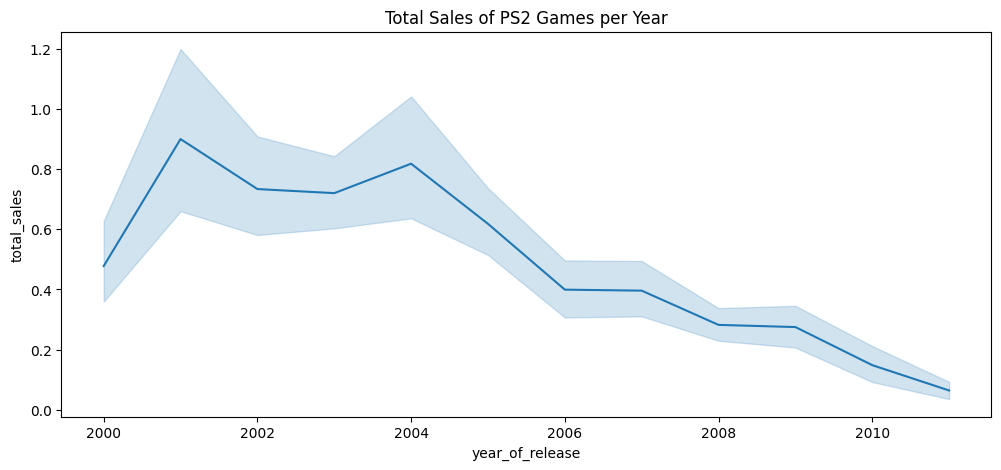

In [43]:
# Graph of PS2 popularity fluctuation
# prepare dataset of sales of games on PS2 platform
ps2_sales = df[df['platform'] == 'PS2']
plt.figure(figsize=(12, 5))
plt.title('Total Sales of PS2 Games per Year')
sns.lineplot(data=ps2_sales, x="year_of_release", y="total_sales")
plt.show()

In terms of growth, the PS2 platform experienced significant expansion, reaching its peak within approximately **one year** (from 2000 to 2001). A slight decline occurred until 2004; however, total sales remained high, ranging from 800 to 900 million dollars. Subsequently, sales consistently decreased until they ceased in mid-2011. This indicates that for the platform with the highest popularity, a duration of one year is required to achieve peak popularity, followed by **seven years for complete market disappearance**.

<span style="font-size:12pt; font-weight: bold;">Preliminary Conclusions</span>

Almost all platforms with the highest sales began to gain popularity in the 2000s. Two platforms that had already established greater popularity were the PS and PC. The distinction lies in the fact that the PS exhibited a negative trend; it was highly popular in the 1990s and 2000s but entirely vanished in the 2010s. Conversely, the PC displayed a positive trend, experiencing moderate popularity upon its initial release (1990s) and showing continuous growth, surpassing 100 million dollars in the 2010s.

Although the PS ranked highest in total sales, its popularity was notably short-lived, lasting only one decade before experiencing a drastic decline in the subsequent decade. This trend contrasts with the four platforms ranked at the bottom: X360, PS3, Wii, and DS. All four began their rise in popularity during the 2000s and maintained total sales above 100 million dollars in the 2010s. However, in the last two decades, the X360 and PS3 exhibited positive trends, while the Wii and DS showed negative trends.

These findings suggest that although the PS2 has the highest total sales over four decades, its consumer base has dissipated in the present context. Consequently, game sales for the PS2 platform are no longer relevant for the year 2017. Similarly, the Wii and DS platforms, which once had high sales, have also demonstrated a decline in popularity. Their sales figures in the 2010s have been overshadowed by the newly emerged PS4. Thus, both the Wii and DS are also considered irrelevant for 2017.

It is also noteworthy to consider the PC platform. While its total sales do not rank highly, the PC is the only platform that has exhibited a consistently positive trend over three decades. Total sales in the most recent decade remain substantial (121 million dollars).

The X360 and PS3 rank as the top two platforms in total sales during the 2010s, with the PS4 in third place. Additionally, the PC remains the sole platform demonstrating a consistent positive trend. 

[Back to Sales by Platform](#Sales-by-Platform)

**In the following analysis are examination of the distribution of game sales data for each of these platforms:**

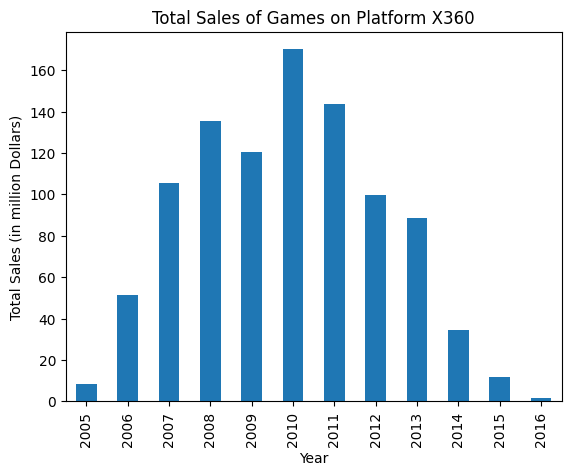

In [80]:
# data distribution of X360 games per year
x360 = df[df['platform'] == 'X360']
x360_sales = x360.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
x360_sales.plot(kind='bar', legend=None)
plt.xlabel('Year')
plt.ylabel('Total Sales (in million Dollars)')
plt.title('Total Sales of Games on Platform X360')
plt.show()

Based on the bar chart above, game sales for the X360 began to increase in 2006, peaking in 2010. However, sales experienced a decline in 2011, with this downward trend continuing until there were no sales recorded in 2016. This outcome contrasts with initial assumptions, where the X360 appeared promising in the 2010s due to its total sales being the highest among the PS3 and PS4.

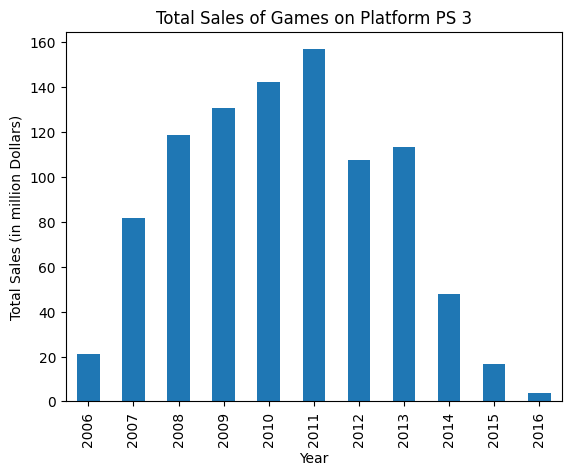

In [45]:
# data distribution of PS3 per year
ps3 = df[df['platform'] == 'PS3']
ps3_sales = ps3.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
ps3_sales.plot(kind='bar', legend=None)
plt.xlabel('Year')
plt.ylabel('Total Sales (in million Dollars)')
plt.title('Total Sales of Games on Platform PS 3')
plt.show()

According to the bar chart above, game sales for the PS3 increased starting in 2007, reaching their peak in 2011. Nevertheless, sales underwent a sharp decline in 2012 and continued to decrease in 2014, ultimately hitting their lowest point in 2016. This also deviates from initial expectations, where the PS3 was perceived as a promising platform in the 2010s due to its total sales surpassing that of the PS4.

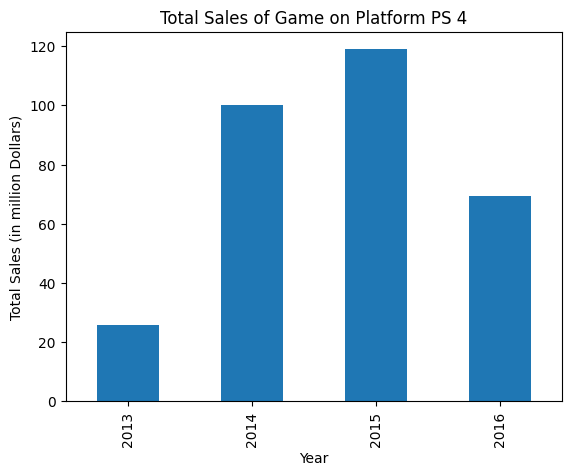

In [46]:
# data distribution of PS4 per year
ps4 = df[df['platform'] == 'PS4']
ps4_sales = ps4.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
ps4_sales.plot(kind='bar', legend=None)
plt.xlabel('Year')
plt.ylabel('Total Sales (in million Dollars)')
plt.title('Total Sales of Game on Platform PS 4')
plt.show()

From the analysis of the bar chart above, game sales for the PS4 experienced a significant surge one year after its debut in 2013, reaching a peak in 2015. However, sales declined by nearly 50% in 2016, falling below 100 million dollars. Although the last year's sales dropped considerably compared to the previous year, the figure of 70 million dollars remains substantial. This indicates that games for the PS4 platform continue to be favored by the market.

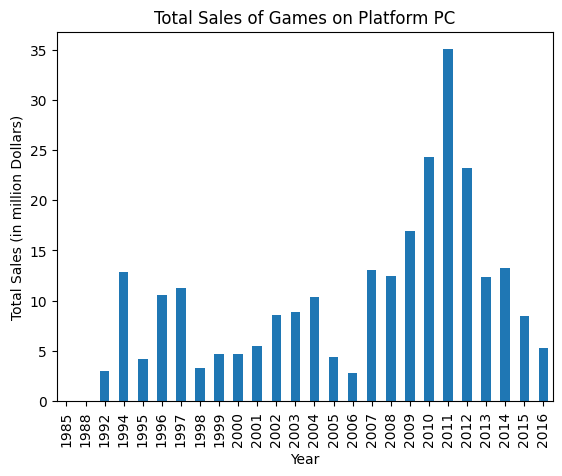

In [47]:
# data distribution of PC per year
pc = df[df['platform'] == 'PC']
pc_sales = pc.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
pc_sales.plot(kind='bar', legend=None)
plt.xlabel('Year')
plt.ylabel('Total Sales (in million Dollars)')
plt.title('Total Sales of Games on Platform PC')
plt.show()

Based on the bar chart above, game sales for PC experienced a sharp increase in 2011; however, this growth was short-lived. Sales consistently declined, reaching approximately 5 million dollars by the end of 2016. Considering its presence since the 1980s, the PC platform is likely to remain popular in the future, albeit with a limited market share.

Consequently, it has been determined that the **platform with the most potential for profitability is the PS4**. Learning from the sales patterns of the PS2, it typically takes seven years from the onset of a negative trend for a game to lose its market appeal entirely. Currently, the PS4 is in its fourth year in the market, and only one year has elapsed since it reached its peak popularity. There remains a possibility for sales to increase, similar to the PS2 during the period from 2002 to 2004. Even in the face of a negative trend, companies can still anticipate sales in the coming years, akin to the PS2 from 2004 to 2011.

[Back to Analysis](#Analysis)

### Global Sales Overview

According to company data, the three largest markets for game sales are Europe, North America, and Japan. However, sales also occur in other regions worldwide, though not as significantly as in these three primary regions. If viewed at the individual country level, the data may lack meaningful insights. Consequently, sales from regions outside these three major markets are combined in the `other_sales` column, which serves as a comparative measure against the three principal markets.

In [48]:
# create new table containing the total of 'other_sales' sorted by platform 
platform_global = df.pivot_table(index='platform', values='other_sales', aggfunc='sum')
platform_global.sort_values(by='other_sales', ascending=False, inplace=True)
platform_global.head()

,other_sales
platform,
PS2,193.44
PS3,135.68
X360,85.76
Wii,79.07
DS,59.26


<AxesSubplot:xlabel='other_sales'>

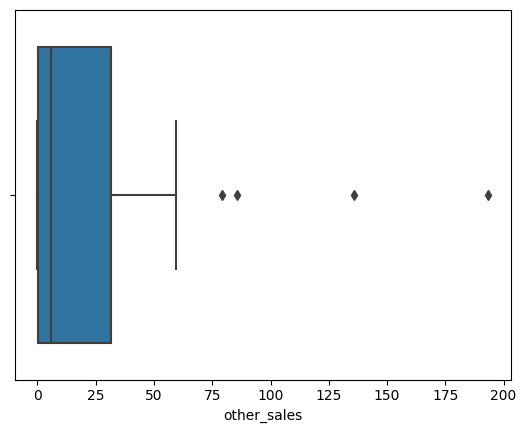

In [49]:
# Boxplot of 'total_sales' by platform 
sns.boxplot(platform_global['other_sales'])

The boxplot above reveals that the lower whisker falls within the box itself. This boxplot indicates a skewed distribution, where the majority of data points are concentrated at lower values, close to zero. Additionally, several points lie considerably beyond the upper whisker, signifying that certain platforms have exceptionally high global sales figures. According to the `platform_global` table, these platforms are the ones ranking at the top (PS2, PS3, X360, Wii, and DS).

This distribution suggests an **imbalance in platform preferences within the global market**. This imbalance may be due to the limited availability of gaming consoles in regions outside the three main markets, resulting in sales being largely concentrated on only the most popular platforms.

[Back to Analysis](#Analysis)

### Game Reviews and Sales Figure

The ICE sales data also includes information on both professional and user (non-professional) reviews. This section examines the relationship between reviews and total sales, focusing on the case of the PS2 platform, which has remained the most popular platform over four decades.

In [50]:
# prepare dataset of PS2 reviews and total sales 
ps2 = df[df['platform'] == 'PS2']
columns_selected = ["name", "critic_score", "user_score", "total_sales"]
ps2_review = ps2[columns_selected]

# display in descending order
ps2_review.head()

,name,critic_score,user_score,total_sales
17,Grand Theft Auto: San Andreas,95.0,9.0,20.81
24,Grand Theft Auto: Vice City,95.0,8.7,16.15
28,Gran Turismo 3: A-Spec,95.0,8.4,14.97
38,Grand Theft Auto III,97.0,8.5,13.10
48,Gran Turismo 4,89.0,8.5,11.65


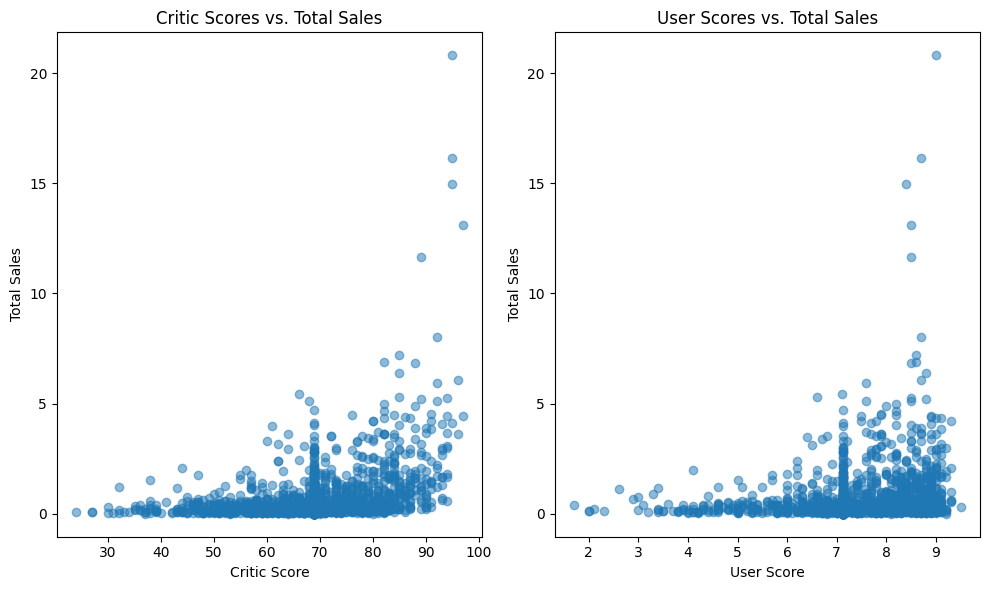

In [51]:
# scatterplot visualization
plt.figure(figsize=(10, 6))

# check correlation between professional reviews and total sales
plt.subplot(1, 2, 1)  # Create the first subplot
plt.scatter(ps2_review['critic_score'], ps2_review['total_sales'], alpha=0.5)
plt.title('Critic Scores vs. Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

# check correlation between users reviews and total sales
plt.subplot(1, 2, 2)  # Create the second subplot
plt.scatter(ps2_review['user_score'], ps2_review['total_sales'], alpha=0.5)
plt.title('User Scores vs. Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

The scatterplot above illustrates a linear relationship between professional reviews and total sales, as well as between user reviews and total sales. Below is the correlation matrix to assess the strength of these relationships.

In [52]:
# correlation matrics of critics score, user score, and total sales
ps2_review.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.517380,0.367454
user_score,0.517380,1.000000,0.210498
total_sales,0.367454,0.210498,1.000000


The correlation matrix above reveals the following:

There exists a moderate linear relationship** between professional and user reviews. This indicates that **games rated highly by professionals often receive high ratings from general users as well**.

There is **a weak linear relationship between professional review scores and total sales**. In some cases, high sales figures are observed for games with high professional ratings. However, this correlation is weak, indicating it is not a sufficiently reliable basis for sales-related decision-making.

There is also **a weak linear relationship between user review scores and total sales**. Although high sales are sometimes observed for games rated highly by users, this correlation is even weaker than that of professional reviews, further limiting its reliability for sales decision-making purposes.

[Back to Analysis](#Analysis)

### Multiplatform Games Sales

The production of games across multiple platforms is a common strategy, as it is relatively rare for individual consumers to own more than one gaming platform. This approach aims to capture a broader market segment by making games available on various systems. This section will analyze sales variations for games released as multiplatform titles.

In [53]:
# identify games with highest number of compatible platforms
df['name'].value_counts()

Need for Speed: Most Wanted        12
Ratatouille                         9
Madden NFL 07                       9
FIFA 14                             9
LEGO Marvel Super Heroes            9
                                   ..
Storm Lover Kai!!                   1
Dark Cloud 2                        1
Don King Presents: Prizefighter     1
Tail Concerto                       1
Sonic Advance 2                     1
Name: name, Length: 11559, dtype: int64

The table above indicates that **"Need for Speed: Most Wanted""** is available on the highest number of platforms, making it the most widely distributed game across different systems.

In [54]:
# display rows containing "Need for Speed: Most Wanted"
nfs_table = df[df['name'] == 'Need for Speed: Most Wanted']

# display rows in descending order by highest critics score
nfs_table.sort_values(by='critic_score', ascending=False, inplace=True)
nfs_table

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,decade
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.000000,8.500000,T,1.56,2010s
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.000000,8.500000,T,1.25,2000s
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.000000,8.800000,T,1.04,2000s
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.000000,9.100000,T,4.37,2000s
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.000000,8.500000,T,0.29,2000s
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.000000,8.500000,T,0.08,2010s
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.000000,9.100000,T,0.56,2000s
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,68.967679,7.136426,unknown,2.81,2010s
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,68.967679,7.136426,unknown,1.01,2010s
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,68.967679,7.136426,unknown,0.27,2010s


*Need for Speed: Most Wanted* has been released in three editions: 2005, 2012, and 2013. The 2005 edition is available on the largest number of platforms, and therefore, a new table will be constructed that excludes the 2012 and 2013 editions to focus on the most widely distributed release.

In [55]:
# filter out rows with year_of_release 2012 and 2013, stored in new table 
nfs_table_2005 = nfs_table[nfs_table['year_of_release'] == 2005]
nfs_table_2005

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,decade
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.000000,8.5,T,1.25,2000s
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.000000,8.8,T,1.04,2000s
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.000000,9.1,T,4.37,2000s
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.000000,8.5,T,0.29,2000s
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.000000,9.1,T,0.56,2000s
6473,Need for Speed: Most Wanted,GBA,2005,Racing,0.19,0.07,0.00,0.00,68.967679,8.3,E,0.26,2000s
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.000000,6.1,E,0.27,2000s


The next step in this section is to examine the variation in Need for Speed: Most Wanted **professional review scores across different platforms**. Review scores for the same game can vary significantly by platform, influenced by several factors, including differences in tactile experience, visual quality, and UX flow. A common assumption is that the higher a game’s professional review score on a particular platform, the higher its total sales. This assumption will be tested using the bar chart below.

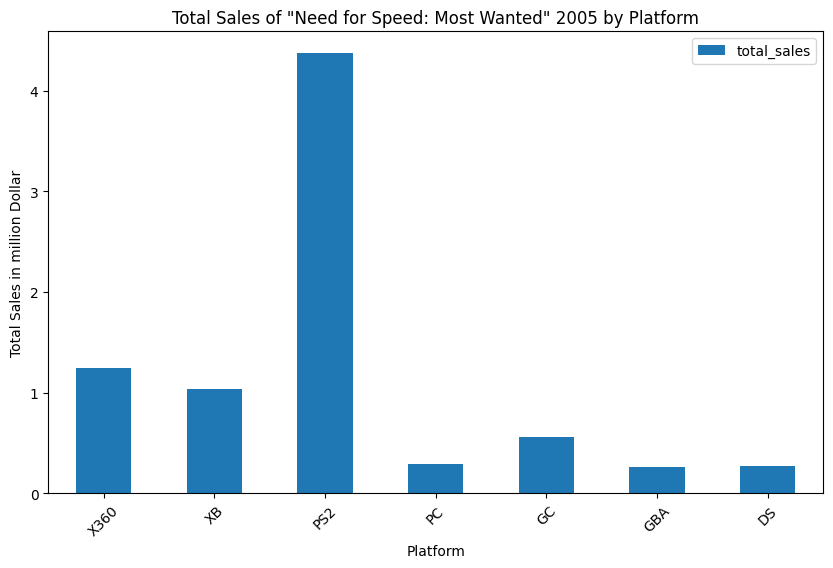

In [56]:
# bar chart visualization
nfs_table_2005.plot(x='platform', y='total_sales', kind='bar', figsize=(10, 6))
plt.xlabel('Platform')
plt.ylabel('Total Sales in million Dollar')
plt.title('Total Sales of "Need for Speed: Most Wanted" 2005 by Platform')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Professional review scores show a positive, though weak, correlation with total sales. This finding is consistent with the bar chart above, which ultimately challenges the assumption that review scores directly drive total sales. *Need for Speed: Most Wanted* achieved the highest professional review score on the X360 platform, yet this platform did not record the highest total sales. Conversely, on the PS2 platform, the game ranked third in professional review scores but led in total sales, with a difference of approximately `$ 3.12` million compared to Xbox 360.

These findings emphasize that **professional review scores alone are not reliable indicators for predicting sales outcomes**. A key influencing factor is likely platform ownership levels. According to "Game Machines: The Encyclopedia of Consoles, Handhelds & Home Computers 1972–2012 (Foster & Winnie, 2012)", PS2 ownership worldwide was significantly higher and more evenly distributed than that of Xbox, naturally contributing to PS2’s stronger game sales despite receiving comparatively lower review scores.

[Back to Analysis](#Analysis)

### Popularity by Genre

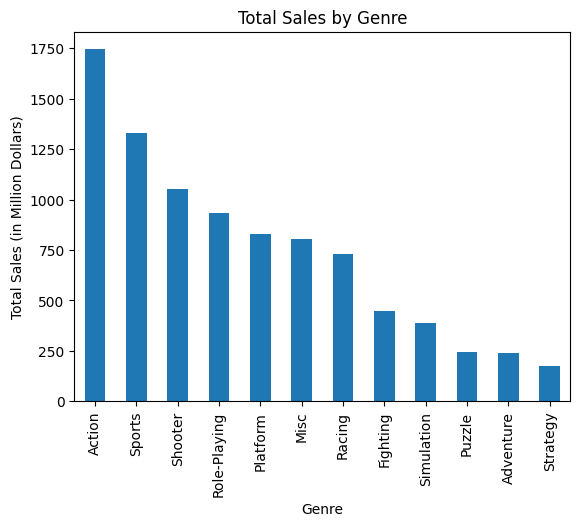

In [57]:
# table of total sales per genre
genre_sales = df.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_sales.sort_values(by='total_sales', ascending=False, inplace=True)
genre_sales.plot(kind='bar', legend=None)
plt.xlabel('Genre')
plt.ylabel('Total Sales (in Million Dollars)')
plt.title('Total Sales by Genre')
plt.show()

Based on total sales, the Action genre records the highest sales, while the Strategy genre ranks the lowest. However, these findings cannot yet be generalized, as they are not adjusted for the average (i.e., total sales normalized by the number of games within each genre).

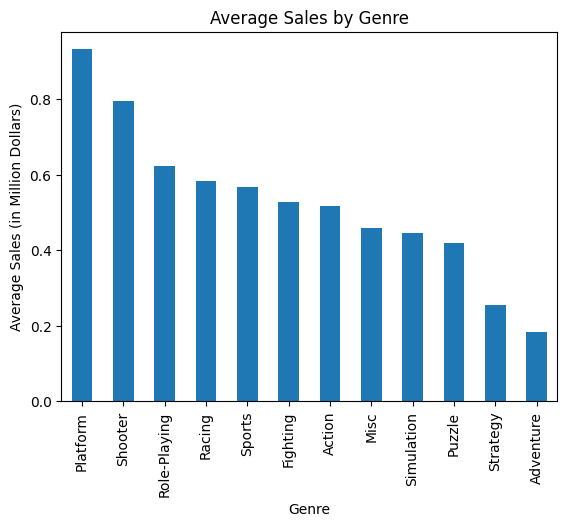

In [58]:
# table of average sales per genre 
genre_avg = df.pivot_table(index='genre', values='total_sales', aggfunc='mean')
genre_avg = genre_avg.rename(columns={'total_sales': 'avg_sales'})
genre_avg.sort_values(by='avg_sales', ascending=False, inplace=True)
genre_avg.plot(kind='bar', legend=None)
plt.xlabel('Genre')
plt.ylabel('Average Sales (in Million Dollars)')
plt.title('Average Sales by Genre')
plt.show()

When assessed by average sales, the top-performing genre is not "Action" but "Platform." This is followed by the "Shooter" and "Role-Playing" genres. "Action" falls to the seventh position, with "Adventure" occupying the last place in terms of average sales.

[Back to Analysis](#Analysis)

[Back to Contents](#contents)

## User Profile by Region

### Platform Popularity by Region

In [59]:
# display 5 platforms with highest total sales in descending order
top_platforms = df.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum')
top_platforms.sort_values(by='total_sales', ascending=False, inplace=True)
top_platforms = top_platforms.drop(top_platforms.index[5:])
top_platforms

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
PS2,339.29,139.20,583.84,1255.77
X360,270.76,12.43,602.47,971.42
PS3,330.29,80.19,393.49,939.65
Wii,262.21,69.33,496.90,907.51
DS,188.89,175.57,382.40,806.12


The table above displays the five most popular platforms based on total global sales. In terms of overall sales, the most popular platform is the PS2, followed by the X360. However, this ranking may vary when examining specific regional markets. This section will analyze user profiles across regions to understand game platform preferences by market.

#### Popular Platform in European Market

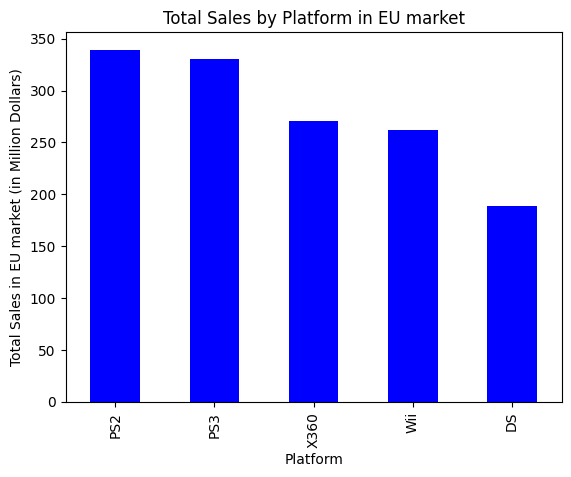

In [60]:
# bar diagram of 5 top-selling platform in EU market
eu_top_platforms = top_platforms.sort_values(by='eu_sales', ascending=False)   
eu_top_platforms.plot(kind='bar', y='eu_sales', color='blue',legend=None)
plt.xlabel('Platform')
plt.ylabel('Total Sales in EU market (in Million Dollars)')
plt.title('Total Sales by Platform in EU market')
plt.show()

In the European market, the most popular platform is the **PS2**, followed by the PS3. None of these top five gaming platforms are from European companies. The popularity of PlayStation's second and third generations in Europe could be attributed to factors such as consumer accessibility to these consoles and their pricing relative to other consoles. 

Chronologically, the PS2 is the oldest, making it the most affordable option. The PS3, released seven years later, was sold at a higher price point. Although the Xbox 360 was introduced around the same time as the PS2, its price range was closer to that of the PS3, and it offered more accessories, potentially explaining its lower popularity compared to the PS2 and PS3.

#### Popular Platform in North American Market

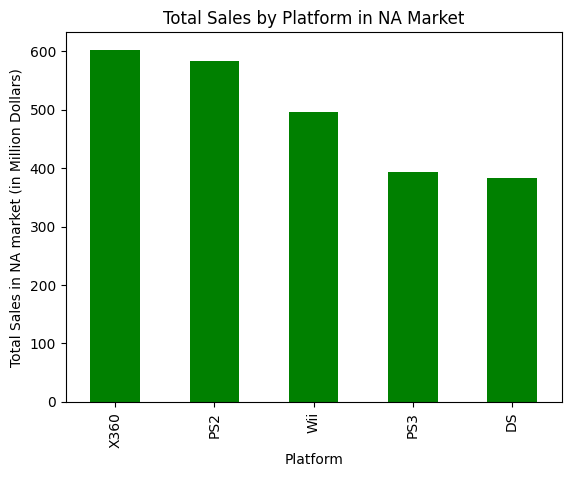

In [61]:
# bar diagram of 5 top-selling platform in NA market
na_top_platforms = top_platforms.sort_values(by='na_sales', ascending=False)   
na_top_platforms.plot(kind='bar', y='na_sales', color='green',legend=None)
plt.xlabel('Platform')
plt.ylabel('Total Sales in NA market (in Million Dollars)')
plt.title('Total Sales by Platform in NA Market')
plt.show()

In the North American market, the **Xbox 360** leads in popularity, followed by the PS2. Xbox’s position at the top is likely due to its production by Microsoft Corporation, a major U.S.-based technology company. This domestic advantage made it easier for Xbox to expand its reach and enhance platform accessibility in the North American market. The high popularity of the PS2, despite being second, is likely influenced by its lower price relative to other platforms.

#### Popular Platform in Japanese Market

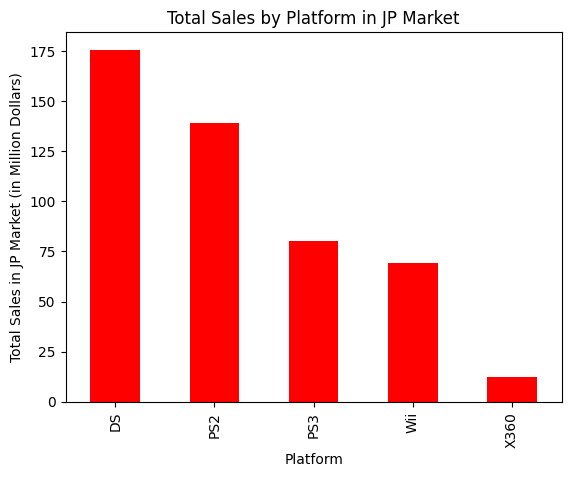

In [62]:
# bar diagram of 5 top-selling platform in JP market
jp_top_platforms = top_platforms.sort_values(by='jp_sales', ascending=False)   
jp_top_platforms.plot(kind='bar', y='jp_sales', color='red',legend=None)
plt.xlabel('Platform')
plt.ylabel('Total Sales in JP Market (in Million Dollars)')
plt.title('Total Sales by Platform in JP Market')
plt.show()

In the Japanese market, the DS is the most popular platform, followed by the PS2. Both platforms are produced by Japanese companies; however, the DS's manufacturer, Nintendo, has been established for a decade longer than Sony, which produces the PS2. Consequently, Nintendo’s stronger local brand identity likely contributed to the DS’s higher popularity among Japanese consumers.

<span style="font-size:12pt; font-weight: bold;">Preliminary Conclusions</span>

Each market exhibits distinct preferences for gaming platforms. In North America and Japan, the most popular platforms are predominantly produced by companies based in those respective countries. In the Japanese market, despite the majority of platforms being manufactured by domestic companies, consumer preference tends to favor those with a longer-standing presence in the industry. Conversely, in the European market, the most popular platforms are also those that enjoy global recognition, namely the PS2 and PS3.

[Back to User Profile by Region](#User-Profile-by-Region)

### Genre Popularity by Region

In [63]:
# display 5 top-selling genres
top_genres = df.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum')
top_genres.sort_values(by='total_sales', ascending=False, inplace=True)
top_genres = top_genres.drop(top_genres.index[5:])
top_genres

,eu_sales,jp_sales,na_sales,total_sales
genre,,,,
Action,519.13,161.43,879.01,1744.17
Sports,376.79,135.54,684.43,1331.27
Shooter,317.34,38.76,592.24,1052.45
Role-Playing,188.71,355.41,330.81,934.56
Platform,200.35,130.83,445.50,827.77


#### Popular Genre in European Market

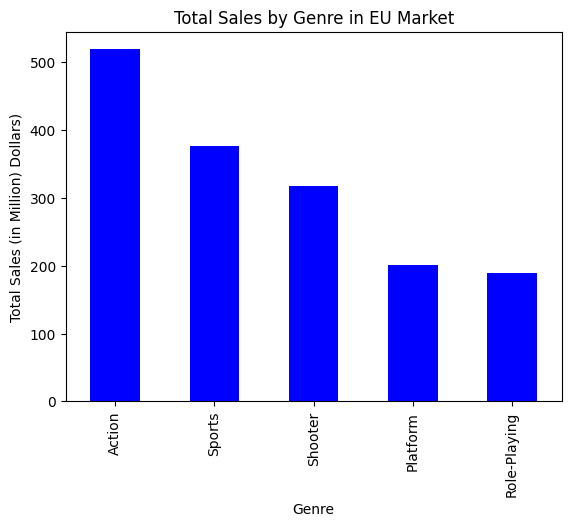

In [64]:
# bar diagram of 5 top-selling genre in EU market
eu_top_genres = top_genres.sort_values(by='eu_sales', ascending=False)   
eu_top_genres.plot(kind='bar', y='eu_sales', color='blue',legend=None)
plt.xlabel('Genre')
plt.ylabel('Total Sales (in Million) Dollars)')
plt.title('Total Sales by Genre in EU Market')
plt.show()

In the European market, the most favored genre is Action, followed by Sports and then Shooter.

#### Popular Genre in North American Market

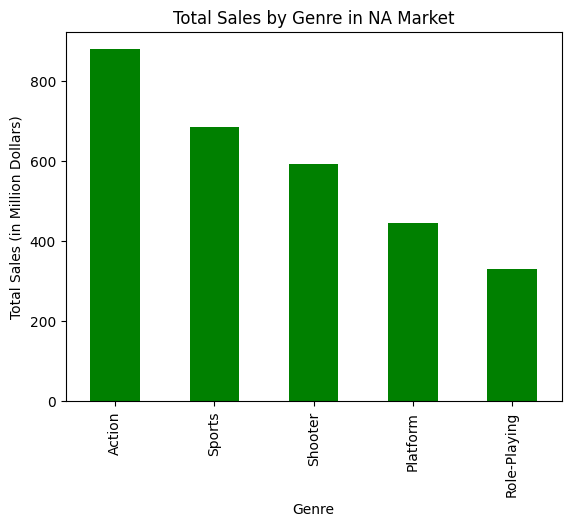

In [65]:
# bar diagram of 5 top-selling genre in NA market
na_top_genres = top_genres.sort_values(by='na_sales', ascending=False)   
na_top_genres.plot(kind='bar', y='na_sales', color='green',legend=None)
plt.xlabel('Genre')
plt.ylabel('Total Sales (in Million Dollars)')
plt.title('Total Sales by Genre in NA Market')
plt.show()

In the North American market, the most popular genre is also Action, followed by Sports and then Shooter. The ranking of genre popularity is identical to that of the European market.

#### Popular Genre in Japanese Market

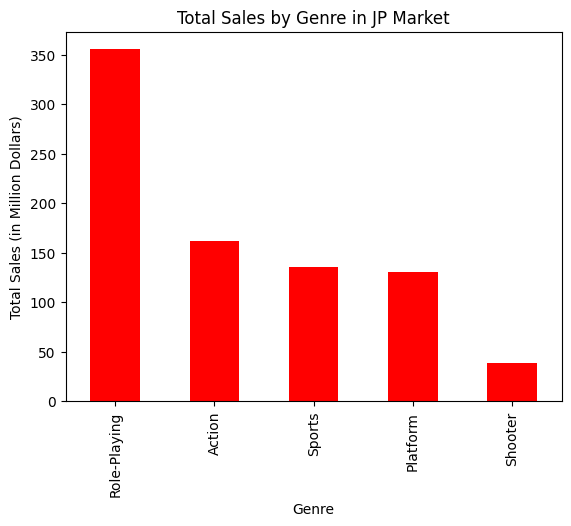

In [66]:
# bar diagram of 5 top-selling genre in JP market
jp_top_genres = top_genres.sort_values(by='jp_sales', ascending=False)   
jp_top_genres.plot(kind='bar', y='jp_sales', color='red',legend=None)
plt.xlabel('Genre')
plt.ylabel('Total Sales (in Million Dollars)')
plt.title('Total Sales by Genre in JP Market')
plt.show()

In contrast, the Japanese market shows a different pattern, with Role-Playing emerging as the most preferred genre, followed by Action and then Sports. This deviation distinguishes it from the trends observed in the other two markets.

<span style="font-size:12pt; font-weight: bold;">Preliminary Conclusions</span>

Genre preferences in the European and North American markets are largely identical, with both regions favoring Action, Sports, and Shooter genres. However, a distinct pattern emerges in the Japanese market, where the Role-Playing genre significantly surpasses all others, and the popularity of the Shooter genre is notably low compared to its counterparts in Europe and North America. This variation in genre preference may be influenced by the availability of games within each genre in the respective markets.

[Back to User Profile by Region](#User-Profile-by-Region)

### Age Rating and Total Sales

In accordance with existing regulations, every game is assigned an age rating that indicates the appropriate age group for which the game is intended. This section aims to examine how age ratings influence total sales in the European, North American, and Japanese markets. The preliminary assumption is that the lowest age rating—in this case, **E (Everyone)** —should exhibit the highest total sales, as it encompasses a broader demographic. Conversely, higher age ratings, such as **AO (Adult Only)**, are expected to correlate with lower total sales due to a smaller demographic reach.

In [67]:
# display total sales by rating category in descending order
rating_rank = df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], aggfunc='sum')
rating_rank.sort_values(by='total_sales', ascending=False, inplace=True)

# drop rows with rating 'unknown'
rating_rank = rating_rank.drop(rating_rank.index[0])
rating_rank

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
E,710.52,199.57,1295.55,2439.84
T,427.03,151.40,759.75,1493.35
M,483.97,64.24,748.48,1473.79
E10+,188.52,40.20,353.32,655.60
AO,0.61,0.00,1.26,1.96
EC,0.11,0.00,1.53,1.75
RP,0.08,0.00,0.00,0.09


The table above indicates that the highest sales are achieved by games categorized with the **E (Everyone)** rating. Games in this category are deemed suitable for all ages. Following this, games rated **T (Teen)** occupy the second position, which are considered appropriate for ages 13 and up. Next are games rated **M (Mature)**, suitable for ages 17 and older. This aligns with the preliminary assumption that lower age ratings correspond to a larger market share, thereby resulting in higher total sales.

The last position is held by games with the **RP (Rating Pending)** category. This designation indicates that these games are still awaiting a rating from the ESRB. Due to the limited number of entries in this category, which cannot adequately represent the actual rating categories, this row will be excluded from further analysis.

In [68]:
# drop rows with rating "RP"
rating_rank = rating_rank.drop(rating_rank.index[-1])
rating_rank

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
E,710.52,199.57,1295.55,2439.84
T,427.03,151.40,759.75,1493.35
M,483.97,64.24,748.48,1473.79
E10+,188.52,40.20,353.32,655.60
AO,0.61,0.00,1.26,1.96
EC,0.11,0.00,1.53,1.75


Following the removal of rows labeled as **RP (Rating Pending)**, the final ranking now features games categorized with the **EC (Early Childhood)** rating in the last position. This category encompasses games deemed suitable for ages 3 and up. The second-to-last position is occupied by games assigned the **AO (Adult Only)** rating, which are regarded as appropriate for ages 18 and over.

This section will proceed to investigate the relationship between game age ratings and sales in the European, North American, and Japanese markets.

#### Sales by Age Rating in European Market

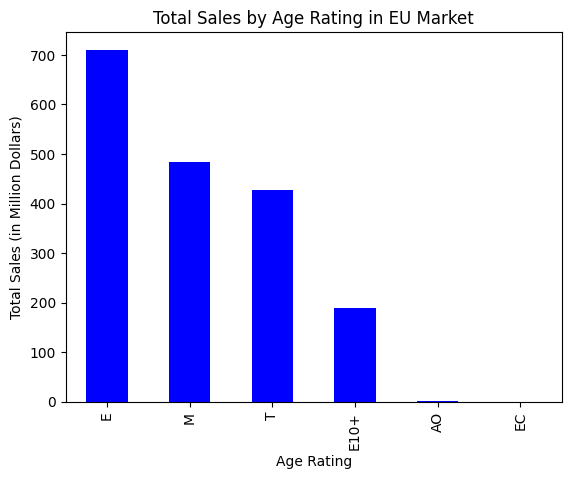

In [69]:
# bar diagram of Age Rating and Total Sales in EU market
eu_rating = rating_rank.sort_values(by='eu_sales', ascending=False)   
eu_rating.plot(kind='bar', y='eu_sales', color='blue',legend=None)
plt.xlabel('Age Rating')
plt.ylabel('Total Sales (in Million Dollars)')
plt.title('Total Sales by Age Rating in EU Market')
plt.show()

The diagram above illustrates that the video games with the highest total sales in the European market belong to the **E (Everyone)** rating, which aligns with the general trend. The lowest sales ranking is also consistent with this trend, with the last position falling under the **EC** rating, followed by the **AO**. 

However, the second to fourth rankings differ from the general trend, as the second most popular rating is **M (Mature)**, designated for players aged 17 and older. Its total sales surpass those of the **T (Teen)** rating. Further research is necessary to identify the factors influencing this pattern.

One topic that could be investigated is the parenting styles in Europe that may affect the activities of children and teenagers. The **E10+** and **T** ratings are specifically designed for children aged 10 to teenagers up to 17. Within this age range, parents serve as gatekeepers in the purchasing decision-making process. The possibility that playing video games is not an activity favored by European parents may explain why sales of games targeted at this age group are lower than those aimed at adults.

#### Sales by Age Rating in North American Market

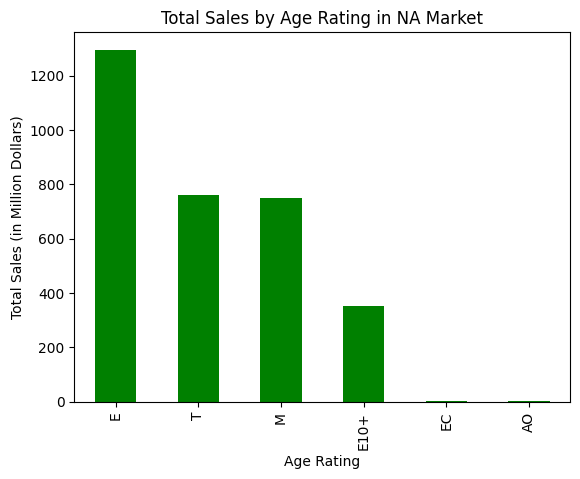

In [70]:
# bar diagram of Age Rating and Total Sales in NA market
na_rating = rating_rank.sort_values(by='na_sales', ascending=False)   
na_rating.plot(kind='bar', y='na_sales', color='green',legend=None)
plt.xlabel('Age Rating')
plt.ylabel('Total Sales (in Million Dollars)')
plt.title('Total Sales by Age Rating in NA Market')
plt.show()

The diagram above indicates that the video games with the highest total sales in the North American market are those rated **E (Everyone)**, followed by **T (Teen)** and **M (Mature)**, which is consistent with the general trend. The lowest sales ranking shows slight variation from the general trend, with the last position falling under the **AO** rating, followed by the **EC** rating.

In contrast to the European market, **the activity of playing video games among children and teenagers is more prevalent in North America**. Furthermore, the total sales of games with an "M" rating are nearly equivalent to those with a "T" rating. This suggests that gaming activity patterns in North America remain relatively consistent across different age groups.

#### Sales by Age Rating in Japanese Market

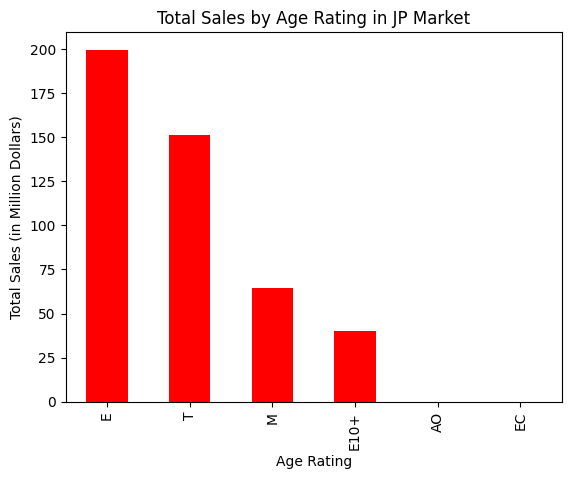

In [71]:
# bar diagram of Age Rating and Total Sales in JP market
jp_rating = rating_rank.sort_values(by='jp_sales', ascending=False)   
jp_rating.plot(kind='bar', y='jp_sales', color='red',legend=None)
plt.xlabel('Age Rating')
plt.ylabel('Total Sales (in Million Dollars)')
plt.title('Total Sales by Age Rating in JP Market')
plt.show()

The diagram above reveals that the video games with the highest total sales in the Japanese market are those rated **"E (Everyone)**, followed by **T (Teen)** and **M (Mature)**, which aligns with the general trend. The lowest sales ranking is also consistent with this trend, where the last position falls under the **EC** rating, followed by the **AO** rating.

A crucial point to consider from this diagram is the sales difference between the "T" and "M" ratings. The gap between the "E" and "T" ratings is approximately `$ 50` million, while the difference between the "T" and "M" ratings is around `$ 90` million. This disparity indicates a shift in gaming activity patterns between children and teenagers and adults.

Unlike the North American market, where gaming activity remains relatively consistent from adolescence to adulthood, adult consumers in Japan exhibit greater segmentation. This suggests that the hobby of gaming among adults is not a common phenomenon in Japanese society. One potential influencing factor is the cultural differences in work ethics between Japan and North America, which affect how individuals spend their leisure time.

<span style="font-size:12pt; font-weight: bold;">Preliminary Conclusions</span>

Age rating has impact on the total sales of video games. Since the age rating system is designed to restrict access to games based on age groups, it follows that a lower age rating should correlate with higher total sales due to broader accessibility for individuals across various age demographics.

Games rated **E (Everyone)** consistently achieve the highest total sales across all three regions. There is no need for specific efforts to maintain or increase sales of "E" rated games, as they will invariably lead in total sales within all regions. Instead, it would be more effective for companies to explore segments that occupy the second and third positions, which differ across each region.

In the European market, targeted efforts could be made to bolster sales of **M (Mature)** rated games. Conversely, in the North American and Japanese markets, specific initiatives could focus on enhancing the sales of **T (Teen)** rated games. Potential strategies may include increasing accessibility, creating communication campaigns relevant to the target age group, and implementing promotions or collaborations aimed at consumers within those age segments.

[Back to Age Rating and Total Sales](#Age-Rating-and-Total-Sales)

[Back to Contents](#contents)

## Hypothesis Testing

### Average Users Review on XBOX 360 and PC

In [72]:
# new dataset of average users review score across platforms
avg_rating = pd.pivot_table(df, index='name', columns='platform', values='user_score', aggfunc='mean').reset_index()

# table of average users review score on X360
avg_x360 = avg_rating.loc[:, ['name', 'X360']].dropna()
avg_x360.sample(5)

platform,name,X360
6935,Omerta: City of Gangsters,3.3
3319,Forza Motorsport 3,8.0
10457,Tornado Outbreak,8.0
10208,The Witcher 2: Assassins of Kings,8.3
1669,Country Dance: All Stars,5.2


In [73]:
# table of average users review score on X360
avg_pc = avg_rating.loc[:, ['name', 'PC']].dropna()
avg_pc.sample(5)

platform,name,PC
9771,Test Drive Unlimited 2,5.7
1760,Crysis: Maximum Edition,8.2
10509,TrackMania Turbo,6.8
8856,Sniper: Ghost Warrior,5.5
10131,The Sims 2: Pets,7.7


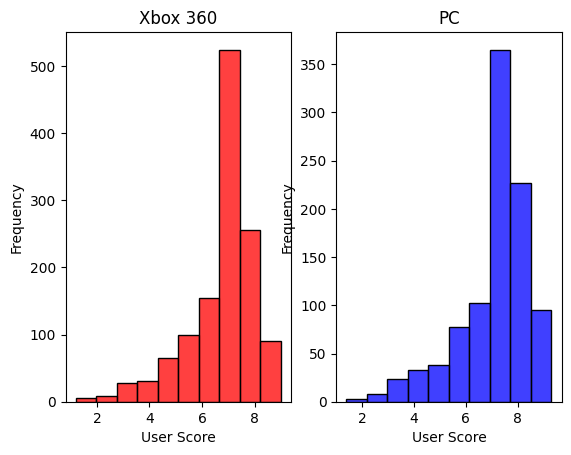

In [74]:
# Histogram 
plt.subplot(1, 2, 1)
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.title('Xbox 360')
sns.histplot(avg_x360['X360'], bins=10, color='red')

plt.subplot(1, 2, 2)
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.title('PC')
sns.histplot(avg_pc['PC'], bins=10, color='blue')
plt.show()

The two histograms above indicate that the distribution of average user review scores for games on the Xbox 360 and PC platforms tends to be non-normally distributed. The average review scores are concentrated between the values of 6 and 8. Below is an examination of the variance and standard deviation for both distributions.

In [75]:
# Variance and standard deviation of users average review score
# Platform Xbox 360
x360_std = round(avg_x360['X360'].std(), 1)
x360_var = round(avg_x360['X360'].var(), 1)
print('Xbox 360:')
print(f'Standard deviation: {x360_std}')
print(f'Variance: {x360_var}')
print()

# Platform PC
pc_std = round(avg_pc['PC'].std(), 1)
pc_var = round(avg_pc['PC'].var(), 1)
print('PC:')
print(f'Standard deviation: {pc_std}')
print(f'Variance: {pc_var}')

Xbox 360:
Standard deviation: 1.3
Variance: 1.6

PC:
Standard deviation: 1.4
Variance: 1.9


The calculation results for standard deviation reveal that **the average user review scores for the PC platform exhibit greater variability** compared to the Xbox 360 platform. However, the difference is minimal. With a minimum value of 1 and a maximum value of 10, the standard deviations for both platforms suggest that the variation in scores is relatively small, predominantly concentrated near the mean value.

The difference in variance between the two datasets is relatively minor, indicating that the assumption of homogeneity of variance holds in this case.

To determine which significance test may be applicable, it remains necessary to conduct the Shapiro-Wilk normality test for both datasets.

In [91]:
# function for normality test
def normality_test(series):
    p_value_shapiro = shapiro(series).pvalue
    print(f'P-Value: {p_value_shapiro}')
    print(f'Alpha  : {alpha}')
    if p_value_shapiro >= alpha:
        print('Fail to reject H0: Data distribution IS normal')
    else:
        print('H0 is rejected: Data distribution is NOT normal')

In [94]:
# Test normality of users average review score on platform Xbox 360
alpha = 0.05
normality_test(avg_x360['X360'])

P-Value: 1.5596075365354002e-29
Alpha  : 0.05
H0 is rejected: Data distribution is NOT normal


In [95]:
# Test normality of users average review score on platform PC
alpha = 0.05
normality_test(avg_pc['PC'])

P-Value: 4.918970770713433e-25
Alpha  : 0.05
H0 is rejected: Data distribution is NOT normal


The normality test results indicate that both datasets do not follow a normal distribution. Consequently, the independent samples t-test cannot be applied. Instead, the significance test will employ the Mann-Whitney U test, which is typically utilized for two independent samples that are non-normally distributed with homogeneous variances. 

Below are the hypotheses being tested:

**H0**: There is NO significant difference between the average review scores of players on the Xbox 360 platform and those on the PC platform.

**H1**: There IS a significant difference between the average review scores of players on the Xbox 360 platform and those on the PC platform.

In [96]:
# test hypothesis
alpha = 0.05
p_value = mannwhitneyu(avg_x360['X360'], avg_pc['PC'], nan_policy='omit').pvalue
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('Fail to reject H0: There is NO significant difference between the average review scores of players on the Xbox 360 platform and those on the PC platform')
else:
    print('H0 is rejected: There IS a significant difference between the average review scores of players on the Xbox 360 platform and those on the PC platform')

Alpha  : 0.05
P-Value: 2.67249719135721e-11
H0 is rejected: There IS a significant difference between the average review scores of players on the Xbox 360 platform and those on the PC platform


The Mann-Whitney U hypothesis test, conducted at an alpha level of 0.05, resulted in the rejection of the null hypothesis and the acceptance of the alternative hypothesis. 

This indicates that **there is a significant difference between the average review scores of players on the Xbox 360 platform and those on the PC platform**.

[Back to Hypothesis Testing](#Hypothesis-Testing)

### Average Users Review of Action dan Sports Genre

In [97]:
# new dataset of average users review score across genres
avg_genre = pd.pivot_table(df, index='name', columns='genre', values='user_score', aggfunc='mean').reset_index()

# table of average users Action games
avg_action = avg_genre.loc[:, ['name', 'Action']].dropna()
avg_action.sample(5)

genre,name,Action
9759,Terminator 3: Rise of the Machines,5.145475
2121,Devil Kings,7.400000
511,Assassin's Creed: Unity,4.000000
7905,Rengoku II: The Stairway To H.E.A.V.E.N.,7.600000
9736,Tenchu: Stealth Assassins,8.800000


In [98]:
# table of average users review score on Sports games
avg_sports = avg_genre.loc[:, ['name', 'Sports']].dropna()
avg_sports.sample(5)

genre,name,Sports
6421,NBA Live 2001,7.568213
6530,NFL Xtreme 2,7.136426
5248,Links 2004,9.000000
9062,Sports Collection,7.136426
8003,River City Super Sports Challenge,7.136426


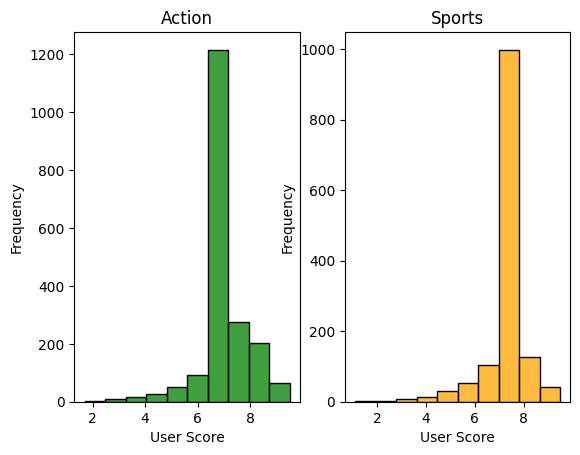

In [99]:
# Histogram
plt.subplot(1, 2, 1)
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.title('Action')
sns.histplot(avg_action['Action'], bins=10, color='green')

plt.subplot(1, 2, 2)
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.title('Sports')
sns.histplot(avg_sports['Sports'], bins=10, color='orange')
plt.show()

The histograms above illustrate that the distribution of average user review scores for both Action and Sports games deviates from normality. User review scores for both genres are primarily concentrated between 6 and 8. An examination of variance and standard deviation for each distribution follows below:

In [100]:
# Variance and standard deviation of users reviews score
# Genre Action
action_std = round(avg_action['Action'].std(), 1)
action_var = round(avg_action['Action'].var(), 1)
print('Genre Action:')
print(f'Standard deviation: {action_std}')
print(f'Variance: {action_var}')
print()

# Genre Sports
sports_std = round(avg_sports['Sports'].std(), 1)
sports_var = round(avg_sports['Sports'].var(), 1)
print('Genre Sports:')
print(f'Standard deviation: {sports_std}')
print(f'Variance: {sports_var}')

Genre Action:
Standard deviation: 0.9
Variance: 0.8

Genre Sports:
Standard deviation: 0.8
Variance: 0.7


The standard deviation calculations indicate that **average user review scores for the Action genre exhibit slightly greater variability** compared to those for the Sports genre. However, the difference remains marginal. With minimum and maximum scores spanning from 1 to 10, the standard deviations for both genres suggest limited variation, with scores largely clustering around the mean. 

The variance difference between the two datasets is also minimal, supporting the assumption of homogeneity of variances in this case. 

To determine the appropriate significance test, a Shapiro-Wilk normality test remains necessary for both datasets.

In [101]:
# normality test of average users reviews score for Action games
alpha = 0.05
normality_test(avg_action['Action'])

P-Value: 1.401298464324817e-45
Alpha  : 0.05
H0 is rejected: Data distribution is NOT normal


In [102]:
# normality test of average users reviews score for Sports games
alpha = 0.05
normality_test(avg_sports['Sports'])

P-Value: 7.51095976878102e-43
Alpha  : 0.05
H0 is rejected: Data distribution is NOT normal


Normality testing reveals that both datasets deviate from a normal distribution. Consequently, an independent samples t-test is unsuitable. Instead, the **Mann-Whitney U test**, appropriate for comparing two independent, non-normal samples with homogeneous variances, will be employed to test for significant differences. 

The hypotheses for this test are as follows:

**H0**: There is NO significant difference between the average user review scores for Action and Sports games.    
**H1**: There IS a significant difference between the average user review scores for Action and Sports games.

In [103]:
# test hypothesis
alpha = 0.05
p_value = mannwhitneyu(avg_action['Action'], avg_sports['Sports'], nan_policy='omit').pvalue
print(f'Alpha  : {alpha}')
print(f'P-Value: {p_value}')
if p_value >= alpha:
    print('Fail to reject H0: There is NO significant difference between the average user review scores for Action and Sports games.')
else:
    print('H0 is rejected: There IS a significant difference between the average user review scores for Action and Sports games.')

Alpha  : 0.05
P-Value: 0.11400453389496806
Fail to reject H0: There is NO significant difference between the average user review scores for Action and Sports games.


The Mann-Whitney U hypothesis test, conducted with an alpha level of 0.05, failed to reject the null hypothesis.
Thus, **there is no significant difference between the average user review scores for players on the Xbox 360 platform and those on the PC platform.**

[Back to Hypothesis Testing](#Hypothesis-Testing)

[Back to Contents](#contents)

## Findings and Conclusions

A sales analysis was conducted for ICE to develop a sales forecasting model for 2017. The initial dataset comprised sales data for 16,715 games released from 1980 to 2016, spanning multiple countries, platforms, and genres. The data preprocessing stage resulted in a refined dataset with 16,173 entries, as well as the addition of a table aggregating total sales across four market regions: Europe, North America, Japan, and other regions. Key preprocessing steps included handling missing values, renaming columns for clarity, and removing redundant categories within columns.

<span style="font-size:14pt; font-weight: bold;">Findings</span>

During the data analysis stage, several key findings were identified:

**Declining trends of game and platform sales**    
The rapid growth of the gaming industry reached its peak in the 2000s but declined in the 2010s, with PlayStation 2 emerging as the most popular platform (with the highest total sales) over four decades. Currently, game and platform sales are trending downward, likely influenced by the surge in smartphone ownership, which allows gaming through apps rather than requiring separate gaming devices.    

The platform with the greatest potential to drive profits in 2017 is the Sony PlayStation 4 (PS4). Based on the popularity trends of the PS2, it generally takes a platform about a year to reach peak popularity after its release, while it takes approximately seven years for its popularity to decline until sales are negligible.

**Review scores are not reliable indicators for predicting sales outcomes**    
An analysis of intervariable relationships yielded the following insights: A weak linear relationship exists between review scores (both from professional critics and general players) and total sales. Although games with high review scores sometimes show higher sales, this correlation is inconsistent, making review scores unreliable as a sole basis for sales-related decisions.

**Multiplatform games sales figure**    
This finding also applies to multiplatform games (the same game produced for multiple platforms), which may receive high review scores on one platform but show higher total sales on another platform with a lower review score. This discrepancy may be influenced by platform availability in specific regions, leading to a regional segmentation analysis.

**Popularity by region**    
A profiling analysis of regions, based on gaming platforms, game genres, and age ratings, shows the following: Each region exhibits distinct preferences regarding gaming platforms. Platforms originating from a country within that region and with longstanding presence tend to be more popular—this trend holds in both the North American and Japanese markets. In contrast, for the European market, where no Europe-based platform ranks in the top five, the favored platforms originate from Japan.

Genre preferences are notably similar between the North American and European markets, with Action, Sports, and Shooter being the top genres. However, in Japan, the leading genre is Role-playing.

**Popularity by age rating**    
Age ratings also impact total sales differently across regions. In all three regions, the most popular rating is E (Everyone). However, distinct preferences emerge for subsequent ratings.

In Europe, the M (Mature) rating is more popular than T (Teen) and E10+ (Everyone 10+), while in North America, T and M ratings share similar popularity. In Japan, a disparity exists, with T-rated games being relatively less popular.

**Platform and genre preferences**    
Hypothesis testing was conducted to assess the significance of differences in user review scores between two platforms (Xbox 360 and PC) and between two genres (Action and Sports). A Mann-Whitney U test with an alpha of 0.05 showed the following:

* There is a significant difference in the average review scores between players on Xbox 360 and those on PC, with Xbox 360 as the lead.     
* However, there is no significant difference in the average review scores between the Action and Sports genres.

<span style="font-size:14pt; font-weight: bold;">Conclusions</span>

Based on this analysis, the recommendation for the company in 2017 is to implement a **location-specific marketing plan**. As gaming consumers on platform-based devices become increasingly segmented over time, the company still has several years to leverage game sales on the PS4 platform. Therefore, a targeted marketing strategy is needed that caters to PS4 gamers by region.

The company should conduct further research and analysis to better understand **user profiles in each region**. By doing so, the company can improve game accessibility (availability) tailored to the user profile in each region and design marketing communications that resonate effectively with these profiles.

[Back to Contents](#contents)